In [1]:
import geopandas as gpd

# Data source - https://www.hydrosheds.org/products/hydrorivers
samerica_rivers = gpd.read_file("data/a00000009.gdbtable")

print(samerica_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        60000001          0  60000001       0.97         0.0         6.5   
1        60000002          0  60000002       1.16         0.0         5.3   
2        60000003          0  60000003       3.37         0.0         7.2   
3        60000004          0  60000004       3.37         0.0         6.3   
4        60000005          0  60000005       3.07         0.0         7.9   
...           ...        ...       ...        ...         ...         ...   
1620958  61620959          0  61620959       1.72         0.0         5.4   
1620959  61620960          0  61620960       0.91         0.0         3.5   
1620960  61620961          0  61620961       1.72         0.0         4.2   
1620961  61620962          0  61620962       0.80         0.0         3.5   
1620962  61620963          0  61620963       2.57         0.0         4.2   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [2]:
# Data source - https://github.com/nvkelso/natural-earth-vector/blob/master/10m_cultural/ne_10m_admin_0_countries.shp
country_shapefiles = gpd.read_file("data//ne_10m_admin_0_countries.shp")
samerica = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'South America']

In [3]:
# Data source - https://github.com/nvkelso/natural-earth-vector/blob/master/10m_physical/ne_10m_lakes.shp

lakes = gpd.read_file("data/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

samerica_lakes = gpd.sjoin(lakes, samerica, op='intersects')
samerica_lakes = lakes.loc[lakes.index.isin(samerica_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(samerica_rivers, samerica_lakes, op='within')
samerica_rivers = samerica_rivers.loc[~samerica_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [4]:
samerica_rivers = samerica_rivers.loc[samerica_rivers['ORD_FLOW'] < 8]

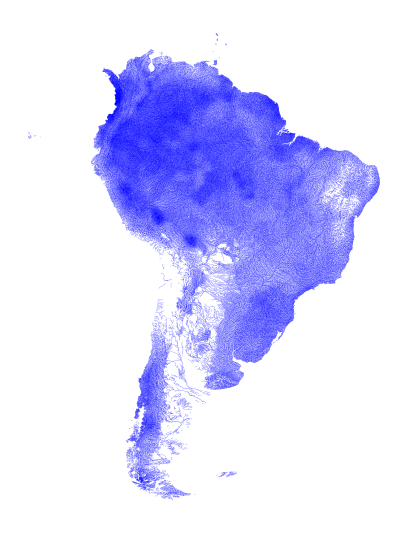

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

samerica_rivers.plot(ax=ax, color='blue', lw=0.1)
samerica_lakes.plot(ax=ax, color='white', alpha=1)

ax.axis('off')
plt.show()

In [6]:
import pandas as pd
import numpy as np

leftSpan = np.amax(samerica_rivers['DIST_UP_KM']) - np.amin(samerica_rivers['DIST_UP_KM'])
rightSpan = 0.6 - 0.04
valueScaled = (samerica_rivers['DIST_UP_KM'] - np.amin(samerica_rivers['DIST_UP_KM'])) / leftSpan
samerica_rivers['LW_DIST_UP_KM'] = 0.04 + (valueScaled * rightSpan)

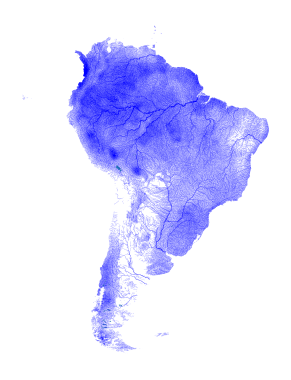

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(3.5, 7)

samerica_rivers.plot(ax=ax, edgecolor='face', color='blue', lw=samerica_rivers['LW_DIST_UP_KM'])
samerica_lakes.plot(ax=ax)


ax.axis('off')

plt.show()

In [8]:
import geopandas as gpd

# Data source - https://www.hydrosheds.org/products/hydrobasins
basins = gpd.read_file("data//hydrobasins_southam.shp")
print(basins.head())

   SUB_BAS  TO_BAS  MAJ_BAS         MAJ_NAME                SUB_NAME  \
0     1003    -999     3001  Caribbean Coast               Altrato 1   
1     1004    1003     3001  Caribbean Coast                   Sucio   
2     1005    1003     3001  Caribbean Coast               Altrato 2   
3     1006    -999     3001  Caribbean Coast  Golfo del Darien Coast   
4     1007    -999     3001  Caribbean Coast                    Sinu   

   SUB_AREA  MAJ_AREA  LEGEND  \
0      5787    317043       1   
1      4933    317043       1   
2     25125    317043       1   
3      9119    317043       1   
4     14009    317043       1   

                                            geometry  
0  POLYGON ((-76.95000 8.12917, -76.95000 8.12500...  
1  POLYGON ((-77.10417 7.41667, -77.10417 7.42083...  
2  POLYGON ((-77.58750 7.17083, -77.58333 7.17083...  
3  POLYGON ((-76.86667 8.02083, -76.87500 8.02083...  
4  POLYGON ((-75.92500 9.45000, -75.92500 9.43750...  


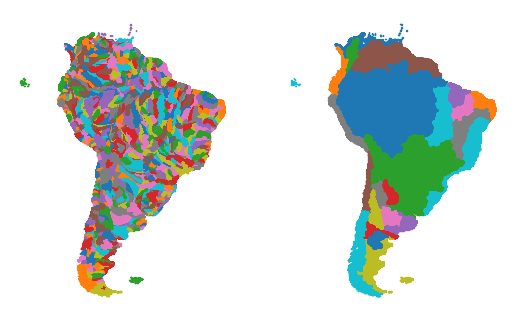

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = plt.subplot(1, 2, 1)
basins.plot(ax=ax1, column='SUB_NAME', edgecolor='face')
ax1.axis('off')

ax2 = plt.subplot(1, 2, 2)
basins.plot(ax=ax2, column='MAJ_NAME', edgecolor='face')
ax2.axis('off')
plt.show()

In [10]:
import pandas as pd

colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange']

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')


C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


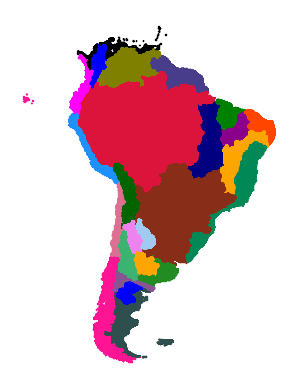

In [11]:
fig, ax = plt.subplots()
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.show()

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


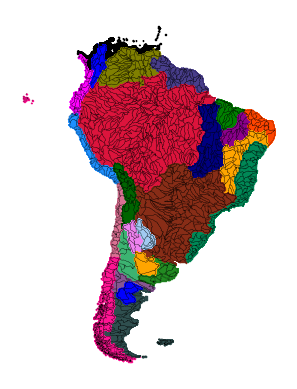

In [12]:
fig, ax = plt.subplots()
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
basins.boundary.plot(ax=ax, color='black', lw=0.1)
ax.axis('off')
plt.show()

In [13]:
rivers_basins = gpd.sjoin(samerica_rivers, basins, predicate="within")

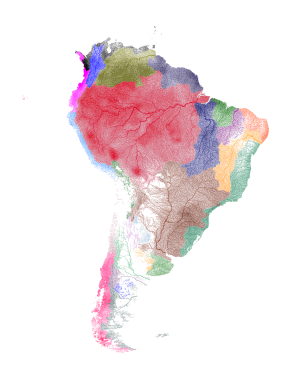

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 7)
rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
ax.axis('off')
plt.show()